In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import pandas as pd

In [2]:
df = pd.DataFrame({'size_sqft':[2104, 1416, 852],
             'bedrooms': [5, 3, 2],
             'floors':[1, 2, 1],
             'age':[45, 40, 35],
             'price_1k':[460, 232, 178]})

In [3]:
X_train = df.to_numpy()[:,:4].reshape(-1,4)
y_train = df.to_numpy()[:,-1]

<a name="toc_15456_4"></a>
# 1 Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


$\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features

Below is an implementation of equations (3) and (4).

A for loop is used over all `m` examples:

In [4]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
        X (ndarray (m,n)): data, m examples with n features
        y (ndarray (m,)) : target values
        w (ndarray (n,)) : model parameters
        b (scalar)       : model parameters
    Returns:
        cost (scalar)    : cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

<a name="toc_15456_5"></a>
# 2 Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


<a name="toc_15456_5.1"></a>
## Compute Gradient with Multiple Variables
An implementation for calculating the equations (6) and (7) is below. While there are many ways to implement this. In this version, I will use an:
- outer loop over all m examples. 
    - $\frac{\partial J(\mathbf{w},b)}{\partial b}$ for the example can be computed directly and accumulated
    - in a second loop over all n features:
        - $\frac{\partial J(\mathbf{w},b)}{\partial w_j}$ is computed for each $w_j$.



In [5]:
X_train.shape

(3, 4)

In [6]:
def compute_gradient(X,  y, w, b):
    """
    Computes the gradient for linear regression
    Args:
        X (ndarray (m,n)): data, m examples with n features
        y (ndarray (m,)) : target values
        w (ndarray (n,)) : model parameters
        b (scalar)       : model parameter
    Returns:
        dj_dw (ndarray (n,)): the gradient of the cost w.r.t the parameter w
        dj_db (scalar)      : the gradient of the cost w.r.t the parameter b
    """
    m,n = X.shape         # number of examples, number of features
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db, dj_dw

<a name="toc_15456_5.2"></a>
## 3 Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [7]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking num_iters gradient steps with learning rate alpha.
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """
    # an array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        
        # calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        # update parameters using w, b, alpha, and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # save cost J at each iteration
        if i < 100000: # prevent resource exhaustion
            J_history.append(cost_function(X, y, w, b))
        
        # print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f'Iteration: {i:4d}: Cost {J_history[-1]:8.2f}')
    return w, b, J_history

# 4 Test Model

In [8]:
# initialize parameters
initial_w = np.zeros(df.shape[1]-1)
initial_b = 0

# gradient descent settings
iterations = 1000
alpha = 5.0e-7

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f'b,w found by gradient descent: {b_final:0.2f}, {w_final:}')

Iteration:    0: Cost  2529.46
Iteration:  100: Cost   695.99
Iteration:  200: Cost   694.92
Iteration:  300: Cost   693.86
Iteration:  400: Cost   692.81
Iteration:  500: Cost   691.77
Iteration:  600: Cost   690.73
Iteration:  700: Cost   689.71
Iteration:  800: Cost   688.70
Iteration:  900: Cost   687.69
b,w found by gradient descent: -0.00, [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]


# 5 Multivariable Linear Regression Prediction

In [9]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [10]:
predict(X_train, w_final, b_final)

array([426.18530497, 286.16747201, 171.46763087])

# 6 Visualize Cost Function

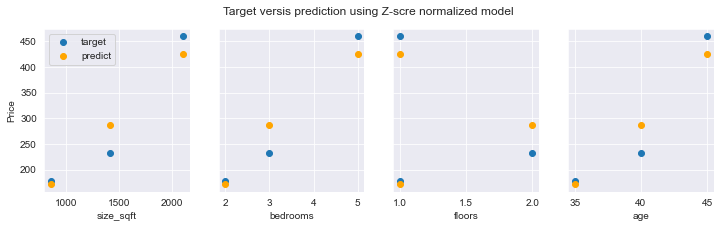

In [11]:
# predict target using normalized features
m = X_train.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_train[i], w_final) + b_final
    
# plot predictions versus original features
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

for i in range(X_train.shape[1]):
    ax[i].scatter(X_train[:,i], y_train, label='target')
    ax[i].set_xlabel(df.columns[i])
    ax[i].scatter(X_train[:,i], yp, color='orange', label='predict')
    
ax[0].set_ylabel('Price')
ax[0].legend()

fig.suptitle('Target versis prediction using Z-scre normalized model')

plt.show()

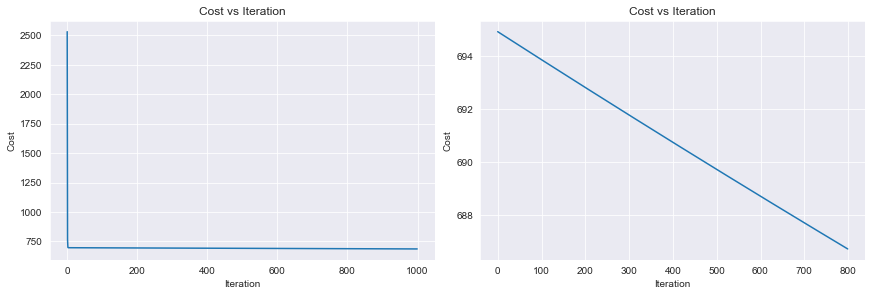

In [12]:
# plot cost versus iteration
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

# all J_hist
ax[0].plot(J_hist)
ax[0].set_title('Cost vs Iteration')
ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Iteration')

# end of J_hist
ax[1].plot(J_hist[200:])
ax[1].set_title('Cost vs Iteration')
ax[1].set_ylabel('Cost')
ax[1].set_xlabel('Iteration')



plt.show()

Predictions are fairly off and the cost function looks jank!

# 7 My Attempt at Improving Features:
- z-normalize features
- increase iterations from 1000 to 10000
- increase alpha from 5.0e-7 to 1.0e-3

In [13]:
def zscore_normalize_features(X):
    """
    computes X, zscore normalized by column
    Args:
        X (ndarray (m,n))     : input data, m examples, n features
    Returns:
        X_norm (ndarray (m,n)): input normalized by column
        mu (ndarray (n,))     : mean of each feature
        sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean/standard deviation of each column/feature
    mu = np.mean(X, axis=0)            # mu will have shape (n,)
    sigma = np.std(X, axis=0)          # sigma will have shape (n,)
    
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma
    
    return (X_norm, mu, sigma)    

In [14]:
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)

In [25]:
# initialize parameters
initial_w = np.zeros(df.shape[1]-1)
initial_b = 0

# change gradient descent settings 
iterations = 10000
alpha = 1.0e-3

# run gradient descent 
w_norm, b_norm, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f'b,w found by gradient descent: {b_final:0.2f}, {w_final:}')

Iteration:    0: Cost 49390.72
Iteration: 1000: Cost  5738.04
Iteration: 2000: Cost   773.32
Iteration: 3000: Cost   104.53
Iteration: 4000: Cost    14.13
Iteration: 5000: Cost     1.91
Iteration: 6000: Cost     0.26
Iteration: 7000: Cost     0.03
Iteration: 8000: Cost     0.00
Iteration: 9000: Cost     0.00
b,w found by gradient descent: -0.00, [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]


In [16]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p    

In [17]:
predict(X_norm, w_norm, b_norm)

array([459.98629621, 231.98843779, 177.98596519])

In [18]:
yp

array([426.18530497, 286.16747201, 171.46763087])

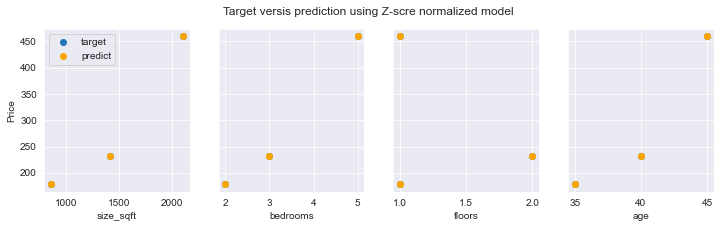

In [19]:
# predict target using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm
    
# plot predictions versus original features
fig, ax = plt.subplots(1, 4, figsize=(12,3), sharey=True)

for i in range(X_norm.shape[1]):
    ax[i].scatter(X_train[:,i], y_train, label='target')
    ax[i].set_xlabel(df.columns[i])
    ax[i].scatter(X_train[:,i], yp, color='orange', label='predict')
    
ax[0].set_ylabel('Price')
ax[0].legend()

fig.suptitle('Target versis prediction using Z-scre normalized model')

plt.show()

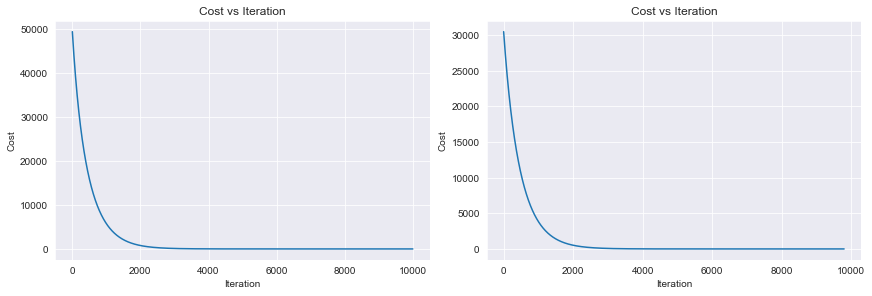

In [20]:
# plot cost versus iteration
fig, ax = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

# all J_hist
ax[0].plot(J_hist)
ax[0].set_title('Cost vs Iteration')
ax[0].set_ylabel('Cost')
ax[0].set_xlabel('Iteration')

# end of J_hist
ax[1].plot(J_hist[200:])
ax[1].set_title('Cost vs Iteration')
ax[1].set_ylabel('Cost')
ax[1].set_xlabel('Iteration')



plt.show()

In [31]:
print(f'expected: {y_train}')
print(f'predicted: {yp.round(2)}')

expected: [460 232 178]
predicted: [459.99 231.99 177.99]
